In [1]:
# Slow Grower efficient frontier 

# this is good 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Number of simulations: 20000
Best Sharpe Ratio Portfolio:
Return: 0.307
Volatility: 0.393
Sharpe Ratio: 0.6794
Weightage Breakdown:
ALSN: 0.62 %
ALX: 0.36 %
AMAL: 9.1 %
AMAT: 34.66 %
AMGN: 8.1 %
AMH: 9.28 %
AMKR: 37.9 %


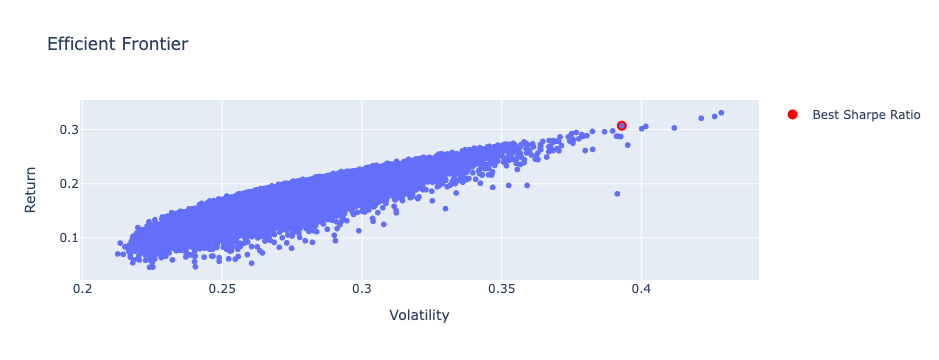

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.express as px

# Define function to fetch historical stock data
def fetch_stock_data(tickers, start_date, end_date):
    stock_data = {}
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date)
        stock_data[ticker] = data['Close']
    return pd.DataFrame(stock_data)

# Define function to calculate portfolio metrics with risk-free rate
def calculate_portfolio_metrics(weights, returns, risk_free_rate):
    portfolio_return = np.sum(weights * returns.mean()) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    excess_return = portfolio_return - risk_free_rate
    sharpe_ratio = excess_return / portfolio_volatility
    return round(portfolio_return, 4), round(portfolio_volatility, 4), round(sharpe_ratio, 4)

# Define function to calculate efficient frontier
def calculate_efficient_frontier(tickers, start_date, end_date, risk_free_rate):
    stock_data = fetch_stock_data(tickers, start_date, end_date)
    returns = stock_data.pct_change().dropna()
    num_assets = len(tickers)
    num_portfolios = 20000
    
    print(f"Number of simulations: {num_portfolios}")
    
    # Generate random portfolio weights
    portfolio_weights = np.random.random(size=(num_portfolios, num_assets))
    portfolio_weights /= portfolio_weights.sum(axis=1, keepdims=True)
    
    # Calculate portfolio metrics for each set of weights
    portfolio_metrics = np.zeros((num_portfolios, 3))
    for i in range(num_portfolios):
        weights = portfolio_weights[i]
        portfolio_metrics[i] = calculate_portfolio_metrics(weights, returns, risk_free_rate)
    
    return portfolio_metrics, portfolio_weights

# Load tickers from the CSV file
stocks_df = pd.read_csv('Slow_Grow_Return_MarketCap.csv')
tickers = stocks_df['Ticker'].tolist()

# Define timeframe
start_date = '2020-01-01'
end_date = '2023-12-31'

# Define risk-free rate
risk_free_rate = 0.04  # 4%

# Calculate efficient frontier
portfolio_metrics, portfolio_weights = calculate_efficient_frontier(tickers, start_date, end_date, risk_free_rate)

# Find the portfolio with the best Sharpe ratio
best_sharpe_idx = np.argmax(portfolio_metrics[:,2])
best_sharpe_portfolio = portfolio_metrics[best_sharpe_idx]
best_sharpe_weights = portfolio_weights[best_sharpe_idx]

# Print best Sharpe ratio and weightage breakdown
print("Best Sharpe Ratio Portfolio:")
print("Return:", best_sharpe_portfolio[0])
print("Volatility:", best_sharpe_portfolio[1])
print("Sharpe Ratio:", best_sharpe_portfolio[2])
print("Weightage Breakdown:")
for i, ticker in enumerate(tickers):
    print(ticker + ":", round(best_sharpe_weights[i] * 100, 2), "%")

# Plot the efficient frontier
fig = px.scatter(x=portfolio_metrics[:,1], y=portfolio_metrics[:,0], labels={'x': 'Volatility', 'y': 'Return'}, title='Efficient Frontier')
fig.add_scatter(x=[best_sharpe_portfolio[1]], y=[best_sharpe_portfolio[0]], mode='markers', marker=dict(size=10, color='red'), name='Best Sharpe Ratio')
fig.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Number of simulations: 20000
Best Sharpe Ratio Portfolio:
Return: 0.2805
Volatility: 0.2537
Sharpe Ratio: 0.9478
Weightage Breakdown:
CCI: 0.09 %
COST: 54.28 %
ODFL: 37.09 %
TDG: 8.49 %
WAB: 0.06 %


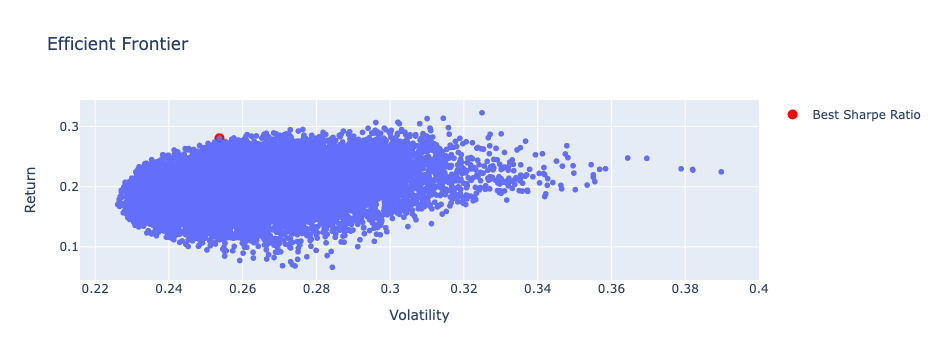

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.express as px

# Define function to fetch historical stock data
def fetch_stock_data(tickers, start_date, end_date):
    stock_data = {}
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date)
        stock_data[ticker] = data['Close']
    return pd.DataFrame(stock_data)

# Define function to calculate portfolio metrics with risk-free rate
def calculate_portfolio_metrics(weights, returns, risk_free_rate):
    portfolio_return = np.sum(weights * returns.mean()) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    excess_return = portfolio_return - risk_free_rate
    sharpe_ratio = excess_return / portfolio_volatility
    return round(portfolio_return, 4), round(portfolio_volatility, 4), round(sharpe_ratio, 4)

# Define function to calculate efficient frontier
def calculate_efficient_frontier(tickers, start_date, end_date, risk_free_rate):
    stock_data = fetch_stock_data(tickers, start_date, end_date)
    returns = stock_data.pct_change().dropna()
    num_assets = len(tickers)
    num_portfolios = 20000
    
    print(f"Number of simulations: {num_portfolios}")
    
    # Generate random portfolio weights
    portfolio_weights = np.random.random(size=(num_portfolios, num_assets))
    portfolio_weights /= portfolio_weights.sum(axis=1, keepdims=True)
    
    # Calculate portfolio metrics for each set of weights
    portfolio_metrics = np.zeros((num_portfolios, 3))
    for i in range(num_portfolios):
        weights = portfolio_weights[i]
        portfolio_metrics[i] = calculate_portfolio_metrics(weights, returns, risk_free_rate)
    
    return portfolio_metrics, portfolio_weights

# Load tickers from the CSV file
stocks_df = pd.read_csv('Stalwart_Return_MarketCap.csv')
tickers = stocks_df['Ticker'].tolist()

# Define timeframe
start_date = '2020-01-01'
end_date = '2023-12-31'

# Define risk-free rate
risk_free_rate = 0.04  # 4%

# Calculate efficient frontier
portfolio_metrics, portfolio_weights = calculate_efficient_frontier(tickers, start_date, end_date, risk_free_rate)

# Find the portfolio with the best Sharpe ratio
best_sharpe_idx = np.argmax(portfolio_metrics[:,2])
best_sharpe_portfolio = portfolio_metrics[best_sharpe_idx]
best_sharpe_weights = portfolio_weights[best_sharpe_idx]

# Print best Sharpe ratio and weightage breakdown
print("Best Sharpe Ratio Portfolio:")
print("Return:", best_sharpe_portfolio[0])
print("Volatility:", best_sharpe_portfolio[1])
print("Sharpe Ratio:", best_sharpe_portfolio[2])
print("Weightage Breakdown:")
for i, ticker in enumerate(tickers):
    print(ticker + ":", round(best_sharpe_weights[i] * 100, 2), "%")

# Plot the efficient frontier
fig = px.scatter(x=portfolio_metrics[:,1], y=portfolio_metrics[:,0], labels={'x': 'Volatility', 'y': 'Return'}, title='Efficient Frontier')
fig.add_scatter(x=[best_sharpe_portfolio[1]], y=[best_sharpe_portfolio[0]], mode='markers', marker=dict(size=10, color='red'), name='Best Sharpe Ratio')
fig.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Number of simulations: 20000
Best Sharpe Ratio Portfolio:
Return: 0.2277
Volatility: 0.2516
Sharpe Ratio: 0.7463
Weightage Breakdown:
A: 0.49 %
AAPL: 35.57 %
BRO: 15.44 %
CRAI: 12.82 %
CW: 2.85 %
KEYS: 7.1 %
LSTR: 8.31 %
MSI: 8.15 %
ROG: 4.86 %
RPM: 4.41 %


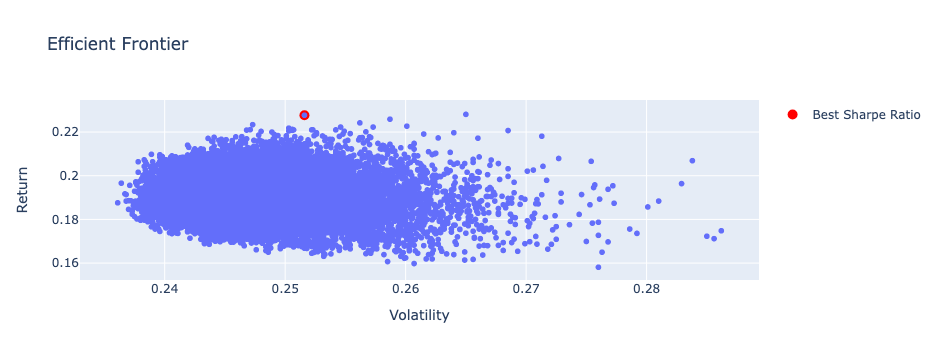

In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.express as px

# Define function to fetch historical stock data
def fetch_stock_data(tickers, start_date, end_date):
    stock_data = {}
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date)
        stock_data[ticker] = data['Close']
    return pd.DataFrame(stock_data)

# Define function to calculate portfolio metrics with risk-free rate
def calculate_portfolio_metrics(weights, returns, risk_free_rate):
    portfolio_return = np.sum(weights * returns.mean()) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    excess_return = portfolio_return - risk_free_rate
    sharpe_ratio = excess_return / portfolio_volatility
    return round(portfolio_return, 4), round(portfolio_volatility, 4), round(sharpe_ratio, 4)

# Define function to calculate efficient frontier
def calculate_efficient_frontier(tickers, start_date, end_date, risk_free_rate):
    stock_data = fetch_stock_data(tickers, start_date, end_date)
    returns = stock_data.pct_change().dropna()
    num_assets = len(tickers)
    num_portfolios = 20000
    
    print(f"Number of simulations: {num_portfolios}")
    
    # Generate random portfolio weights
    portfolio_weights = np.random.random(size=(num_portfolios, num_assets))
    portfolio_weights /= portfolio_weights.sum(axis=1, keepdims=True)
    
    # Calculate portfolio metrics for each set of weights
    portfolio_metrics = np.zeros((num_portfolios, 3))
    for i in range(num_portfolios):
        weights = portfolio_weights[i]
        portfolio_metrics[i] = calculate_portfolio_metrics(weights, returns, risk_free_rate)
    
    return portfolio_metrics, portfolio_weights

# Load tickers from the CSV file
stocks_df = pd.read_csv('Fast_Grower_Return_MarketCap.csv')
tickers = stocks_df['Ticker'].tolist()

# Define timeframe
start_date = '2020-01-01'
end_date = '2023-12-31'

# Define risk-free rate
risk_free_rate = 0.04  # 4%

# Calculate efficient frontier
portfolio_metrics, portfolio_weights = calculate_efficient_frontier(tickers, start_date, end_date, risk_free_rate)

# Find the portfolio with the best Sharpe ratio
best_sharpe_idx = np.argmax(portfolio_metrics[:,2])
best_sharpe_portfolio = portfolio_metrics[best_sharpe_idx]
best_sharpe_weights = portfolio_weights[best_sharpe_idx]

# Print best Sharpe ratio and weightage breakdown
print("Best Sharpe Ratio Portfolio:")
print("Return:", best_sharpe_portfolio[0])
print("Volatility:", best_sharpe_portfolio[1])
print("Sharpe Ratio:", best_sharpe_portfolio[2])
print("Weightage Breakdown:")
for i, ticker in enumerate(tickers):
    print(ticker + ":", round(best_sharpe_weights[i] * 100, 2), "%")

# Plot the efficient frontier
fig = px.scatter(x=portfolio_metrics[:,1], y=portfolio_metrics[:,0], labels={'x': 'Volatility', 'y': 'Return'}, title='Efficient Frontier')
fig.add_scatter(x=[best_sharpe_portfolio[1]], y=[best_sharpe_portfolio[0]], mode='markers', marker=dict(size=10, color='red'), name='Best Sharpe Ratio')
fig.show()
